# Performing Exploratory Data Analysis (EDA)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/processed/merged_data.csv')

## Step 1: Understanding the Data

In [3]:
df.shape

(8785, 11)

In [4]:
display(df.head()) # price_actual == total_lmp_rt

,datetime_beginning_ept,price_actual,hour_of_day,day_of_week,month,price_1h_ago,price_24h_ago,avg_price_last_24h,temp_c,wind_kph,solar_radiation
0,2024-01-01 00:00:00,31.3827,0.0,1.0,1.0,NaN,NaN,NaN,3.0,5.0,0.0
1,2024-01-01 01:00:00,20.0838,1.0,1.0,1.0,31.3827,NaN,31.38270,3.0,5.0,0.0
2,2024-01-01 02:00:00,17.6052,2.0,1.0,1.0,20.0838,NaN,25.73325,3.0,5.2,0.0
3,2024-01-01 03:00:00,19.7673,3.0,1.0,1.0,17.6052,NaN,23.02390,2.7,4.1,0.0
4,2024-01-01 04:00:00,17.0687,4.0,1.0,1.0,19.7673,NaN,22.20975,2.2,3.5,0.0


In [5]:
display(df.tail())

,datetime_beginning_ept,price_actual,hour_of_day,day_of_week,month,price_1h_ago,price_24h_ago,avg_price_last_24h,temp_c,wind_kph,solar_radiation
8780,2024-12-30 20:00:00,27.7654,20.0,1.0,12.0,20.3882,20.9625,18.431871,7.2,10.7,0.0
8781,2024-12-30 21:00:00,26.0735,21.0,1.0,12.0,27.7654,17.2637,18.715325,6.7,11.8,0.0
8782,2024-12-30 22:00:00,22.3144,22.0,1.0,12.0,26.0735,17.0165,19.082400,6.1,11.1,0.0
8783,2024-12-30 23:00:00,25.7732,23.0,1.0,12.0,22.3144,16.4983,19.303146,5.2,9.2,0.0
8784,2024-12-31 00:00:00,26.6046,0.0,2.0,12.0,25.7732,16.8661,19.689600,4.8,10.7,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8785 entries, 0 to 8784
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   datetime_beginning_ept  8785 non-null   object 
 1   price_actual            8785 non-null   float64
 2   hour_of_day             8785 non-null   float64
 3   day_of_week             8785 non-null   float64
 4   month                   8785 non-null   float64
 5   price_1h_ago            8784 non-null   float64
 6   price_24h_ago           8761 non-null   float64
 7   avg_price_last_24h      8784 non-null   float64
 8   temp_c                  8785 non-null   float64
 9   wind_kph                8785 non-null   float64
 10  solar_radiation         8785 non-null   float64
dtypes: float64(10), object(1)
memory usage: 755.1+ KB


In [7]:
df.query("price_actual < 0")

,datetime_beginning_ept,price_actual,hour_of_day,day_of_week,month,price_1h_ago,price_24h_ago,avg_price_last_24h,temp_c,wind_kph,solar_radiation
4036,2024-06-16 05:00:00,-9.7263,5.0,0.0,6.0,5.3698,13.2672,18.882850,13.9,4.5,3.0
4037,2024-06-16 06:00:00,-8.2194,6.0,0.0,6.0,-9.7263,12.0195,17.924788,15.4,5.7,84.0
4038,2024-06-16 07:00:00,-34.7736,7.0,0.0,6.0,-8.2194,11.3776,17.081500,17.2,3.6,250.0


In [8]:
df.describe(include="all")

,datetime_beginning_ept,price_actual,hour_of_day,day_of_week,month,price_1h_ago,price_24h_ago,avg_price_last_24h,temp_c,wind_kph,solar_radiation
count,8785,8785.000000,8785.000000,8785.000000,8785.000000,8784.000000,8761.000000,8784.000000,8785.000000,8785.000000,8785.000000
unique,8760,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2024-03-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,33.246676,11.498577,2.991690,6.490609,33.247432,33.282703,33.249579,13.176073,9.854468,172.870461
std,NaN,28.238686,6.923438,1.997961,3.444748,28.240205,28.267943,14.326938,9.898713,5.361678,249.710997
min,NaN,-34.773600,0.000000,0.000000,1.000000,-34.773600,-34.773600,11.098363,-11.400000,0.200000,0.000000
25%,NaN,19.222200,5.000000,1.000000,3.000000,19.222125,19.250700,24.235561,5.100000,6.100000,0.000000
50%,NaN,26.266700,11.000000,3.000000,7.000000,26.266150,26.292300,30.314835,13.600000,8.700000,8.000000
75%,NaN,37.230400,17.000000,5.000000,9.000000,37.231900,37.287600,37.904010,21.000000,12.600000,304.000000


In [9]:
df.isna().sum()

datetime_beginning_ept     0
price_actual               0
hour_of_day                0
day_of_week                0
month                      0
price_1h_ago               1
price_24h_ago             24
avg_price_last_24h         1
temp_c                     0
wind_kph                   0
solar_radiation            0
dtype: int64

In [10]:
duplicates = df[df.duplicated(subset=["datetime_beginning_ept"], keep=False)]
if not duplicates.empty:
    display(duplicates)
print(f"{len(duplicates)} Duplicates found" if len(duplicates) > 0 else "No duplicates found")

,datetime_beginning_ept,price_actual,hour_of_day,day_of_week,month,price_1h_ago,price_24h_ago,avg_price_last_24h,temp_c,wind_kph,solar_radiation
1536,2024-03-05 00:00:00,10.5022,0.0,2.0,3.0,10.7928,12.9025,19.804671,8.6,11.8,0.0
1537,2024-03-05 00:00:00,10.5022,0.0,2.0,3.0,10.5022,11.9517,19.704658,8.6,11.8,0.0
1538,2024-03-05 01:00:00,11.7147,1.0,2.0,3.0,10.5022,10.9382,19.644262,7.9,10.8,0.0
1539,2024-03-05 01:00:00,11.7147,1.0,2.0,3.0,11.7147,12.2846,19.676617,7.9,10.8,0.0
1540,2024-03-05 02:00:00,10.9530,2.0,2.0,3.0,11.7147,18.0207,19.652871,7.8,12.2,0.0
1541,2024-03-05 02:00:00,10.9530,2.0,2.0,3.0,10.9530,20.8977,19.358383,7.8,12.2,0.0
1542,2024-03-05 03:00:00,11.8804,3.0,2.0,3.0,10.9530,24.5050,18.944021,7.4,12.6,0.0
1543,2024-03-05 03:00:00,11.8804,3.0,2.0,3.0,11.8804,27.2745,18.417996,7.4,12.6,0.0
1544,2024-03-05 04:00:00,17.7751,4.0,2.0,3.0,11.8804,22.8234,17.776575,6.7,11.7,0.0
1545,2024-03-05 04:00:00,17.7751,4.0,2.0,3.0,17.7751,14.6609,17.566229,6.7,11.7,0.0


50 Duplicates found


In [11]:
# Summary Function 
def summarize_df(df, df_name="df"):
    """
    Display key information about a DataFrame:
    - info()
    - describe()
    - duplicated rows
    - count of missing values
    """
    print(f"===== DataFrame ({df_name.upper()}) Summary =====")
    print("===== DataFrame Info =====")
    df.info()
    print("\n===== DataFrame Description =====")
    display(df.describe(include='all'))  # include='all' to describe non-numeric columns too
    print("\n===== Duplicate Rows =====")
    duplicates = df[df.duplicated(keep=False)]
    if not duplicates.empty:
        display(duplicates)
    else:
        print("No duplicate rows found.")
    print("\n===== Missing Values per Column =====")
    print(df.isna().sum())


summarize_df(df)

===== DataFrame (DF) Summary =====
===== DataFrame Info =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8785 entries, 0 to 8784
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   datetime_beginning_ept  8785 non-null   object 
 1   price_actual            8785 non-null   float64
 2   hour_of_day             8785 non-null   float64
 3   day_of_week             8785 non-null   float64
 4   month                   8785 non-null   float64
 5   price_1h_ago            8784 non-null   float64
 6   price_24h_ago           8761 non-null   float64
 7   avg_price_last_24h      8784 non-null   float64
 8   temp_c                  8785 non-null   float64
 9   wind_kph                8785 non-null   float64
 10  solar_radiation         8785 non-null   float64
dtypes: float64(10), object(1)
memory usage: 755.1+ KB

===== DataFrame Description =====


,datetime_beginning_ept,price_actual,hour_of_day,day_of_week,month,price_1h_ago,price_24h_ago,avg_price_last_24h,temp_c,wind_kph,solar_radiation
count,8785,8785.000000,8785.000000,8785.000000,8785.000000,8784.000000,8761.000000,8784.000000,8785.000000,8785.000000,8785.000000
unique,8760,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2024-03-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,33.246676,11.498577,2.991690,6.490609,33.247432,33.282703,33.249579,13.176073,9.854468,172.870461
std,NaN,28.238686,6.923438,1.997961,3.444748,28.240205,28.267943,14.326938,9.898713,5.361678,249.710997
min,NaN,-34.773600,0.000000,0.000000,1.000000,-34.773600,-34.773600,11.098363,-11.400000,0.200000,0.000000
25%,NaN,19.222200,5.000000,1.000000,3.000000,19.222125,19.250700,24.235561,5.100000,6.100000,0.000000
50%,NaN,26.266700,11.000000,3.000000,7.000000,26.266150,26.292300,30.314835,13.600000,8.700000,8.000000
75%,NaN,37.230400,17.000000,5.000000,9.000000,37.231900,37.287600,37.904010,21.000000,12.600000,304.000000



===== Duplicate Rows =====
No duplicate rows found.

===== Missing Values per Column =====
datetime_beginning_ept     0
price_actual               0
hour_of_day                0
day_of_week                0
month                      0
price_1h_ago               1
price_24h_ago             24
avg_price_last_24h         1
temp_c                     0
wind_kph                   0
solar_radiation            0
dtype: int64


## Step 2: Data Preparation

In [12]:
df.dtypes

datetime_beginning_ept     object
price_actual              float64
hour_of_day               float64
day_of_week               float64
month                     float64
price_1h_ago              float64
price_24h_ago             float64
avg_price_last_24h        float64
temp_c                    float64
wind_kph                  float64
solar_radiation           float64
dtype: object

In [13]:
# Dropping missing values 
df = df.dropna()

# Dropping duplicates rows based on datetime_beginning_ept
df = df.drop_duplicates(subset=["datetime_beginning_ept"], keep="first")

# Converting datetime_beginning_ept to datetime object
df["datetime_beginning_ept"] = pd.to_datetime(df["datetime_beginning_ept"])

# I kept negative prices since in Energy Trading, negative prices are real.

# Setting datetime_beginning_ept as index
df.set_index("datetime_beginning_ept", inplace=True)

# Sorting the index, essential for Time-Series
df.sort_index(inplace=True)


summarize_df(df, df_name="df_cleaned")

===== DataFrame (DF_CLEANED) Summary =====
===== DataFrame Info =====
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8736 entries, 2024-01-02 00:00:00 to 2024-12-31 00:00:00
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   price_actual        8736 non-null   float64
 1   hour_of_day         8736 non-null   float64
 2   day_of_week         8736 non-null   float64
 3   month               8736 non-null   float64
 4   price_1h_ago        8736 non-null   float64
 5   price_24h_ago       8736 non-null   float64
 6   avg_price_last_24h  8736 non-null   float64
 7   temp_c              8736 non-null   float64
 8   wind_kph            8736 non-null   float64
 9   solar_radiation     8736 non-null   float64
dtypes: float64(10)
memory usage: 750.8 KB

===== DataFrame Description =====


,price_actual,hour_of_day,day_of_week,month,price_1h_ago,price_24h_ago,avg_price_last_24h,temp_c,wind_kph,solar_radiation
count,8736.000000,8736.000000,8736.000000,8736.000000,8736.000000,8736.000000,8736.000000,8736.000000,8736.000000,8736.000000
mean,33.278590,11.499771,3.000229,6.514766,33.280508,33.313805,33.300629,13.217903,9.870650,173.569254
std,28.297715,6.922930,1.999886,3.437097,28.297486,28.294552,14.345796,9.908276,5.366993,250.165110
min,-34.773600,0.000000,0.000000,1.000000,-34.773600,-34.773600,11.098363,-11.400000,0.200000,0.000000
25%,19.222125,5.750000,1.000000,4.000000,19.222125,19.270475,24.265934,5.200000,6.100000,0.000000
50%,26.266850,11.500000,3.000000,7.000000,26.266850,26.314500,30.366700,13.650000,8.700000,8.000000
75%,37.270625,17.250000,5.000000,10.000000,37.283700,37.302700,37.931695,21.000000,12.600000,307.000000
max,492.583300,23.000000,6.000000,12.000000,492.583300,492.583300,117.905671,37.000000,36.800000,980.000000



===== Duplicate Rows =====
No duplicate rows found.

===== Missing Values per Column =====
price_actual          0
hour_of_day           0
day_of_week           0
month                 0
price_1h_ago          0
price_24h_ago         0
avg_price_last_24h    0
temp_c                0
wind_kph              0
solar_radiation       0
dtype: int64


In [14]:
# Checking if the index are datetime objects
df.index

DatetimeIndex(['2024-01-02 00:00:00', '2024-01-02 01:00:00',
               '2024-01-02 02:00:00', '2024-01-02 03:00:00',
               '2024-01-02 04:00:00', '2024-01-02 05:00:00',
               '2024-01-02 06:00:00', '2024-01-02 07:00:00',
               '2024-01-02 08:00:00', '2024-01-02 09:00:00',
               ...
               '2024-12-30 15:00:00', '2024-12-30 16:00:00',
               '2024-12-30 17:00:00', '2024-12-30 18:00:00',
               '2024-12-30 19:00:00', '2024-12-30 20:00:00',
               '2024-12-30 21:00:00', '2024-12-30 22:00:00',
               '2024-12-30 23:00:00', '2024-12-31 00:00:00'],
              dtype='datetime64[ns]', name='datetime_beginning_ept', length=8736, freq=None)

In [15]:
for col in df.select_dtypes(include="number"):
        df[col] = df[col].round(4) 

display(df.head())

,price_actual,hour_of_day,day_of_week,month,price_1h_ago,price_24h_ago,avg_price_last_24h,temp_c,wind_kph,solar_radiation
datetime_beginning_ept,,,,,,,,,,
2024-01-02 00:00:00,21.3249,0.0,2.0,1.0,23.3484,31.3827,29.3789,2.0,10.8,0.0
2024-01-02 01:00:00,19.6885,1.0,2.0,1.0,21.3249,20.0838,28.9598,1.2,8.0,0.0
2024-01-02 02:00:00,20.0916,2.0,2.0,1.0,19.6885,17.6052,28.9433,0.4,6.4,0.0
2024-01-02 03:00:00,18.6212,3.0,2.0,1.0,20.0916,19.7673,29.0469,0.5,10.7,0.0
2024-01-02 04:00:00,18.6391,4.0,2.0,1.0,18.6212,17.0687,28.9992,-0.3,12.0,0.0


In [16]:
clean_df = df.copy()
display(clean_df.head())

,price_actual,hour_of_day,day_of_week,month,price_1h_ago,price_24h_ago,avg_price_last_24h,temp_c,wind_kph,solar_radiation
datetime_beginning_ept,,,,,,,,,,
2024-01-02 00:00:00,21.3249,0.0,2.0,1.0,23.3484,31.3827,29.3789,2.0,10.8,0.0
2024-01-02 01:00:00,19.6885,1.0,2.0,1.0,21.3249,20.0838,28.9598,1.2,8.0,0.0
2024-01-02 02:00:00,20.0916,2.0,2.0,1.0,19.6885,17.6052,28.9433,0.4,6.4,0.0
2024-01-02 03:00:00,18.6212,3.0,2.0,1.0,20.0916,19.7673,29.0469,0.5,10.7,0.0
2024-01-02 04:00:00,18.6391,4.0,2.0,1.0,18.6212,17.0687,28.9992,-0.3,12.0,0.0


## Step 3: Feature Understanding (Univariate Analysis)

In [17]:
# Presenting the columns of the cleaned dataframe
clean_df.columns

Index(['price_actual', 'hour_of_day', 'day_of_week', 'month', 'price_1h_ago',
       'price_24h_ago', 'avg_price_last_24h', 'temp_c', 'wind_kph',
       'solar_radiation'],
      dtype='object')

In [18]:
clean_df.describe()

,price_actual,hour_of_day,day_of_week,month,price_1h_ago,price_24h_ago,avg_price_last_24h,temp_c,wind_kph,solar_radiation
count,8736.000000,8736.000000,8736.000000,8736.000000,8736.000000,8736.000000,8736.000000,8736.000000,8736.000000,8736.000000
mean,33.278590,11.499771,3.000229,6.514766,33.280508,33.313805,33.300629,13.217903,9.870650,173.569254
std,28.297715,6.922930,1.999886,3.437097,28.297486,28.294552,14.345797,9.908276,5.366993,250.165110
min,-34.773600,0.000000,0.000000,1.000000,-34.773600,-34.773600,11.098400,-11.400000,0.200000,0.000000
25%,19.222125,5.750000,1.000000,4.000000,19.222125,19.270475,24.265900,5.200000,6.100000,0.000000
50%,26.266850,11.500000,3.000000,7.000000,26.266850,26.314500,30.366700,13.650000,8.700000,8.000000
75%,37.270625,17.250000,5.000000,10.000000,37.283700,37.302700,37.931675,21.000000,12.600000,307.000000
max,492.583300,23.000000,6.000000,12.000000,492.583300,492.583300,117.905700,37.000000,36.800000,980.000000


#### Histogram Plots

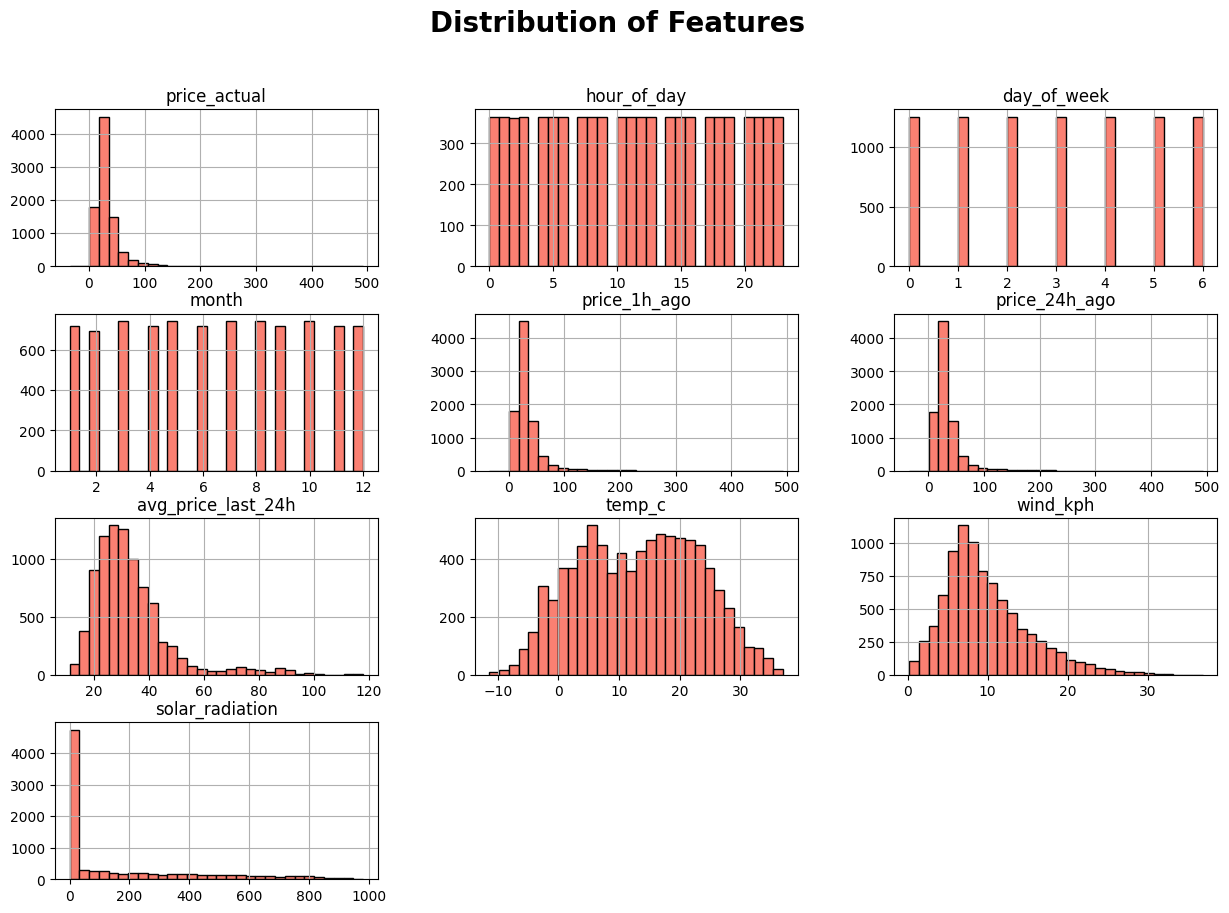

In [19]:
# Visualizing the distribution of all columns
clean_df.hist(figsize=(15, 10), bins=30, color="salmon", edgecolor="black")
plt.suptitle("Distribution of Features", fontsize=20, fontweight="bold")
plt.show()

#### Box Plots

In [20]:
clean_df.describe()

,price_actual,hour_of_day,day_of_week,month,price_1h_ago,price_24h_ago,avg_price_last_24h,temp_c,wind_kph,solar_radiation
count,8736.000000,8736.000000,8736.000000,8736.000000,8736.000000,8736.000000,8736.000000,8736.000000,8736.000000,8736.000000
mean,33.278590,11.499771,3.000229,6.514766,33.280508,33.313805,33.300629,13.217903,9.870650,173.569254
std,28.297715,6.922930,1.999886,3.437097,28.297486,28.294552,14.345797,9.908276,5.366993,250.165110
min,-34.773600,0.000000,0.000000,1.000000,-34.773600,-34.773600,11.098400,-11.400000,0.200000,0.000000
25%,19.222125,5.750000,1.000000,4.000000,19.222125,19.270475,24.265900,5.200000,6.100000,0.000000
50%,26.266850,11.500000,3.000000,7.000000,26.266850,26.314500,30.366700,13.650000,8.700000,8.000000
75%,37.270625,17.250000,5.000000,10.000000,37.283700,37.302700,37.931675,21.000000,12.600000,307.000000
max,492.583300,23.000000,6.000000,12.000000,492.583300,492.583300,117.905700,37.000000,36.800000,980.000000


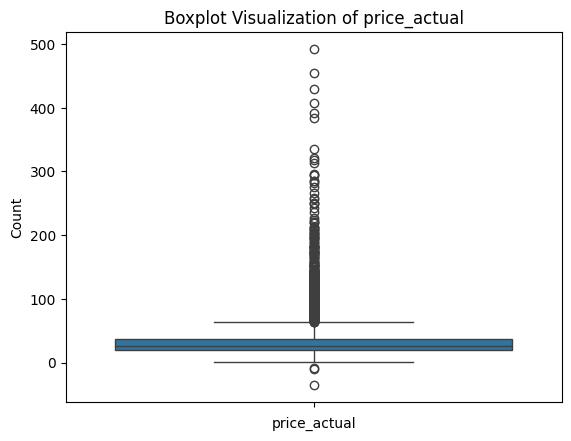

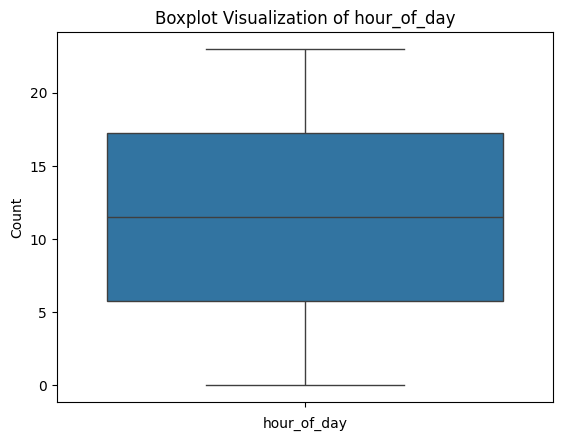

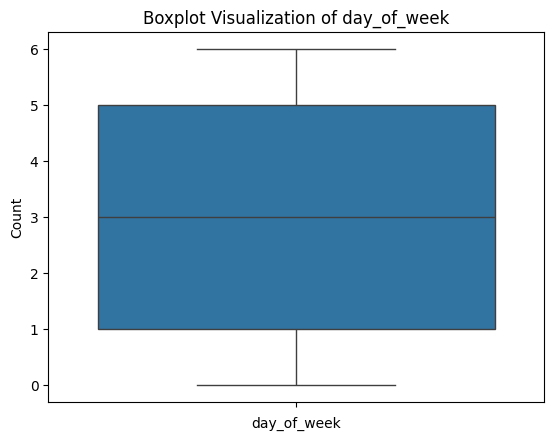

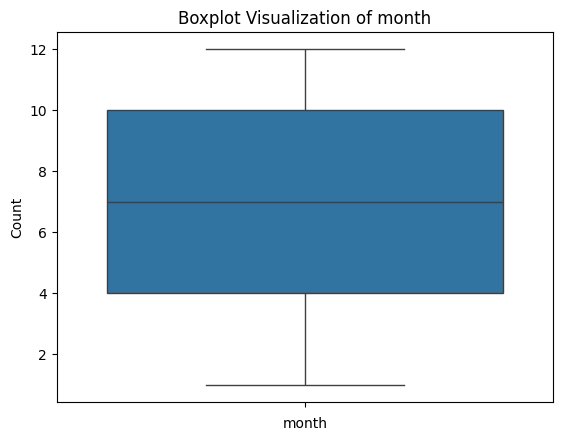

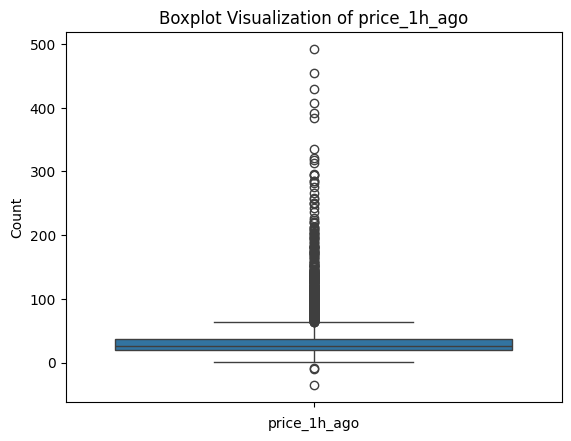

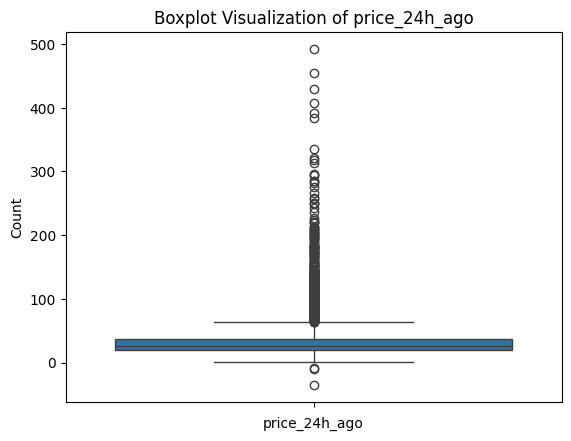

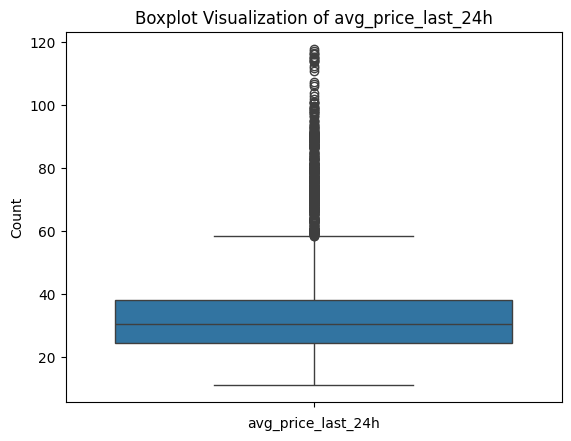

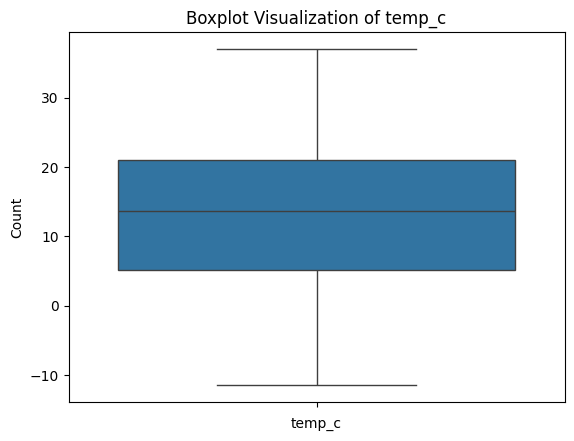

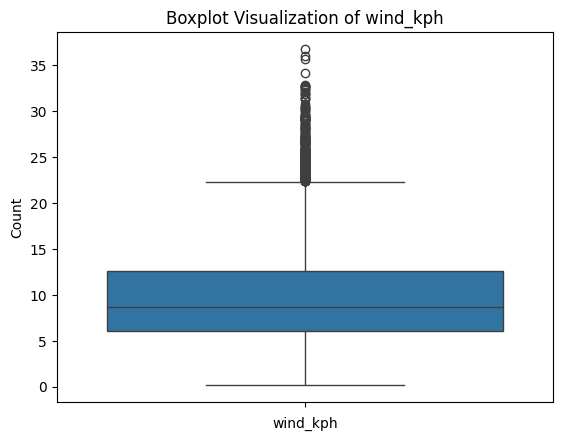

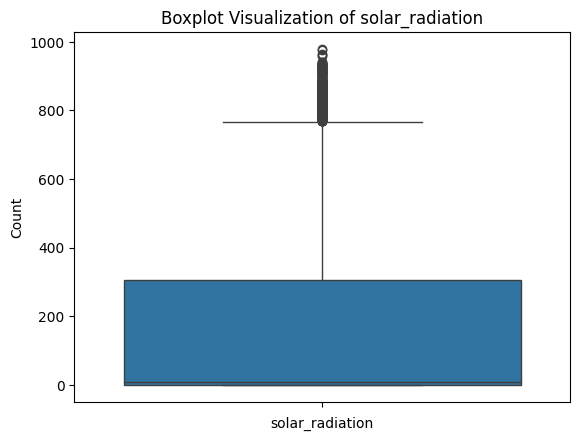

In [21]:
# Visualizing the distribution of all columns
# cols = [col for col in clean_df.columns if col != "price_actual"]
for col in clean_df.columns:
    sns.boxplot(y=col, data=clean_df)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.title(f"Boxplot Visualization of {col}")
    plt.show()

#### Violin Plots

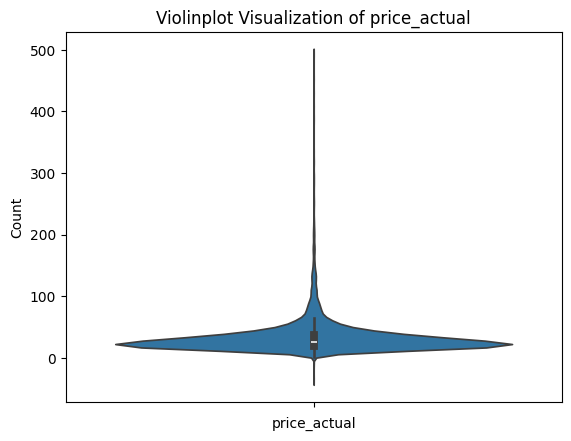

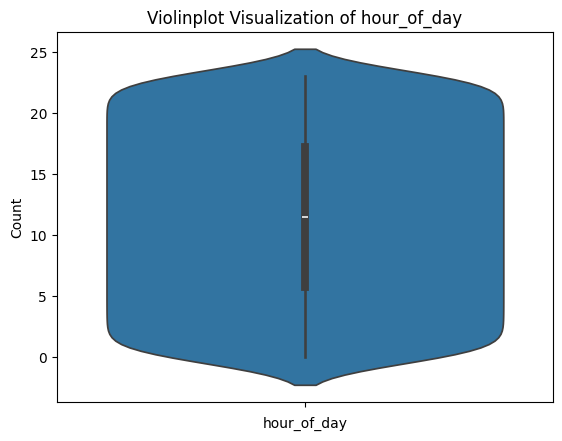

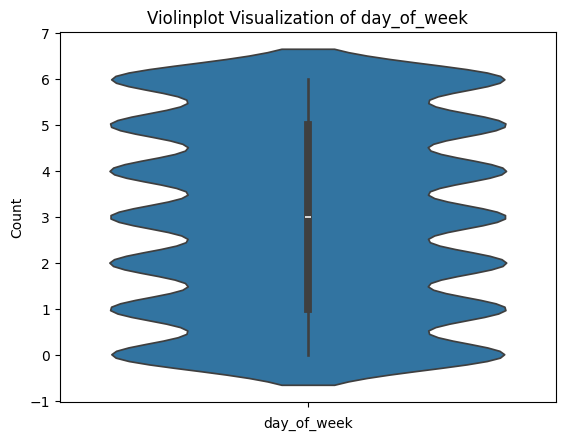

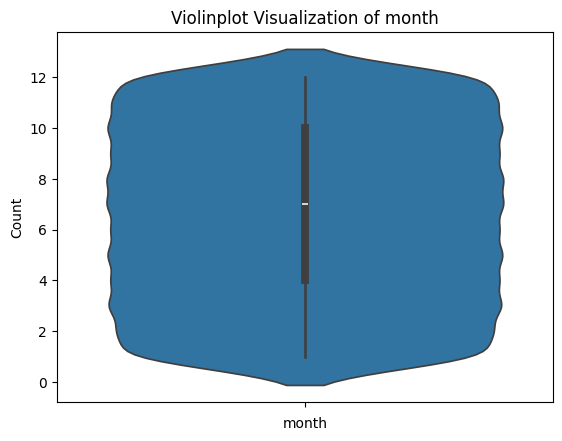

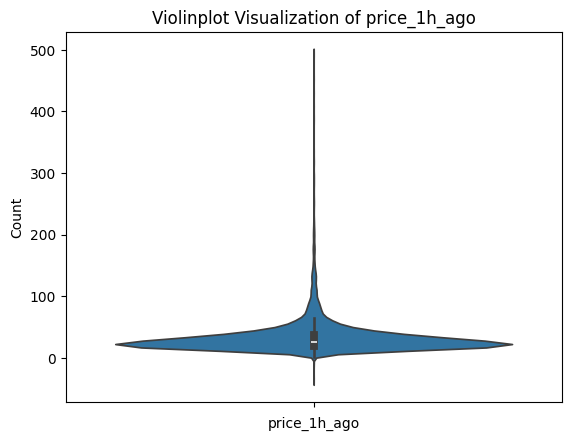

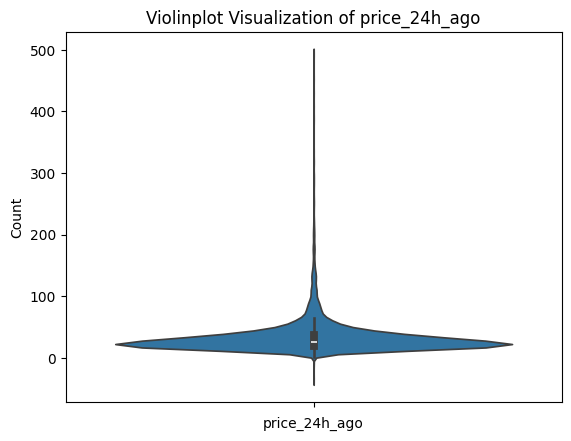

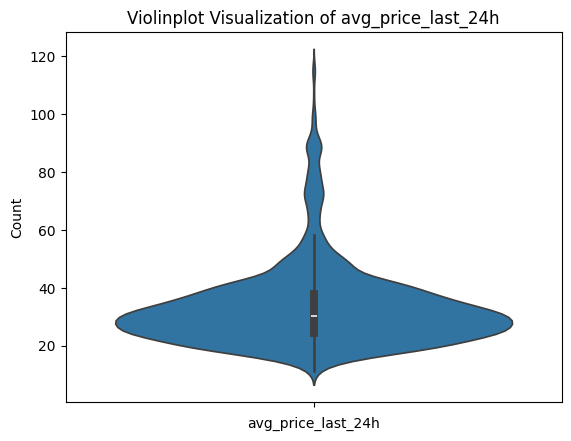

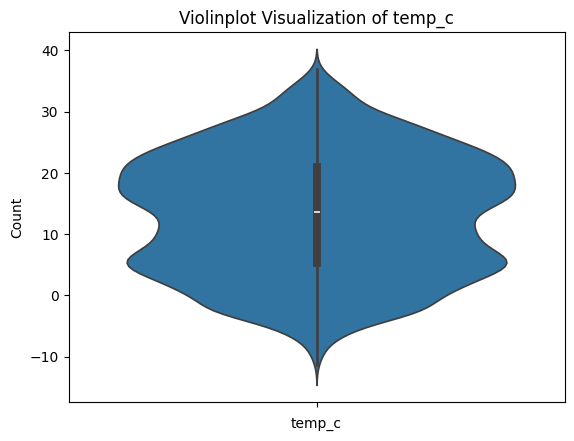

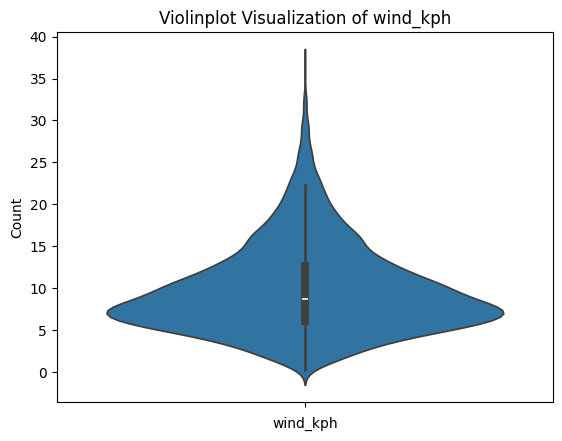

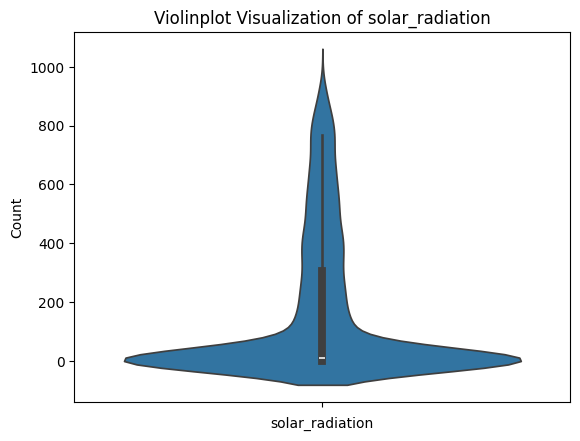

In [22]:
# Visualizing the distribution of all columns
# cols = [col for col in clean_df.columns if col != "price_actual"]
for col in clean_df.columns:
    sns.violinplot(y=col, data=clean_df)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.title(f"Violinplot Visualization of {col}")
    plt.show()

## Step 4: Understanding Relationship (Bivariate Analysis)

#### Line Plot

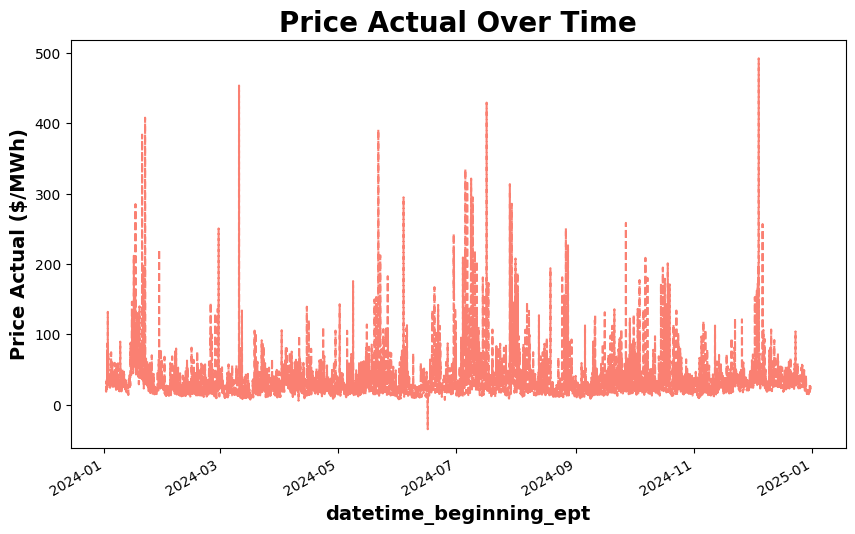

In [23]:
# Variation of price_actual over time
df["price_actual"].plot(kind="line", color="salmon", figsize=(10, 6), linestyle="--")
plt.title("Price Actual Over Time", fontsize=20, fontweight="bold")
plt.ylabel("Price Actual ($/MWh)", fontsize=14, fontweight="bold")
plt.xlabel("datetime_beginning_ept", fontsize=14, fontweight="bold")
plt.show()

#### Pair Plot

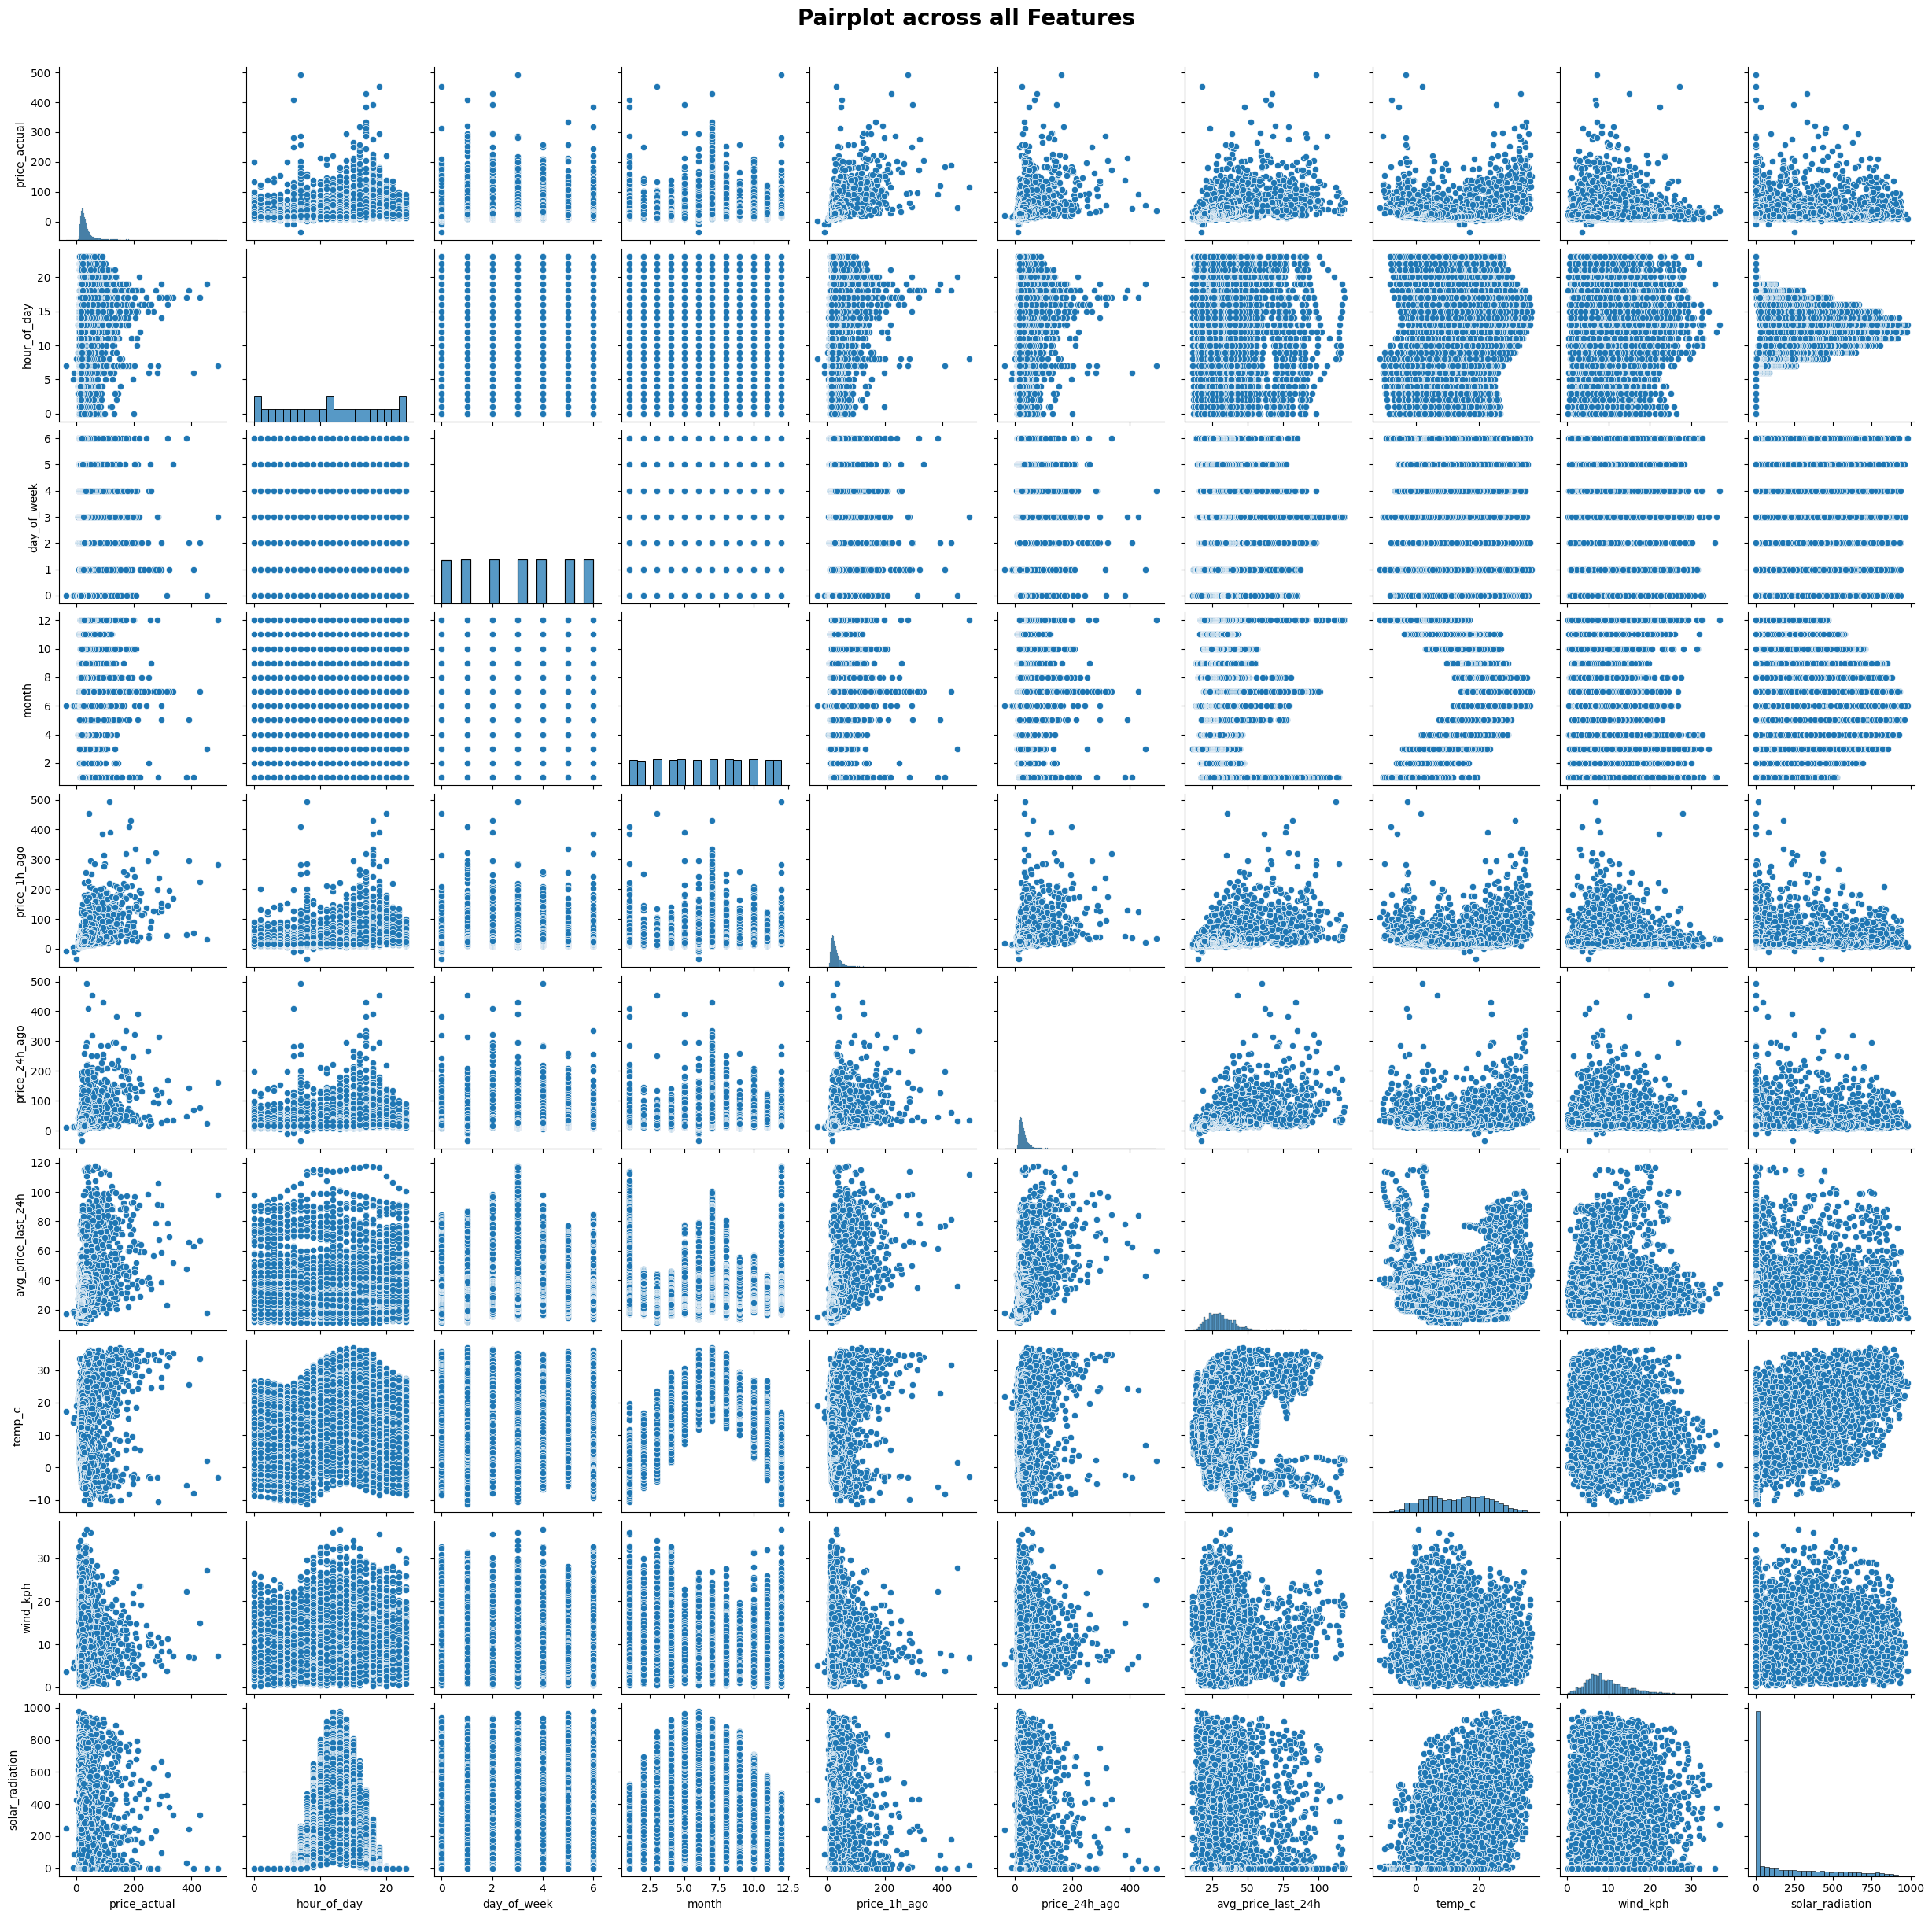

In [24]:
g = sns.pairplot(data=df)
g.figure.suptitle("Pairplot across all Features", fontsize=20, fontweight="bold")
g.figure.subplots_adjust(top=.95) # title position adjustment
plt.show()

#### Scatter Plots

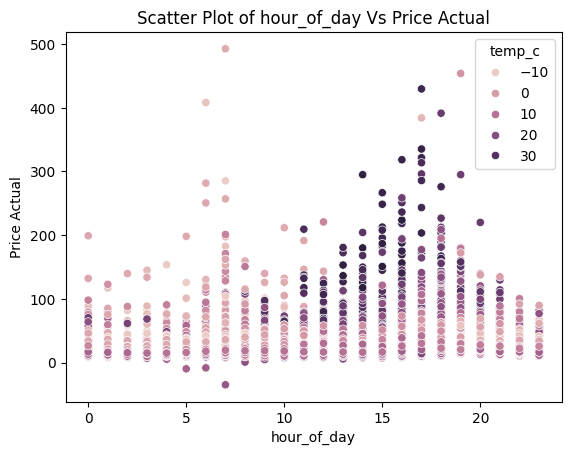

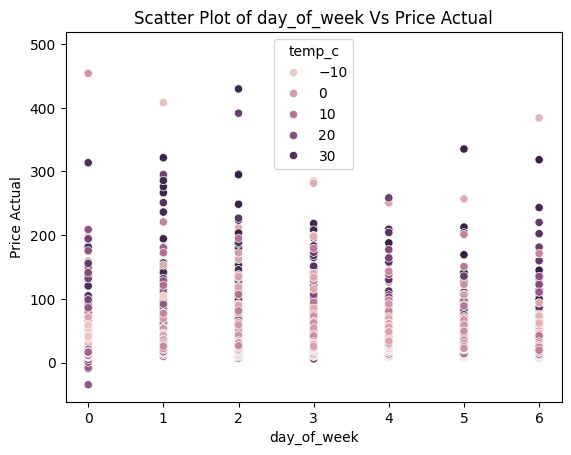

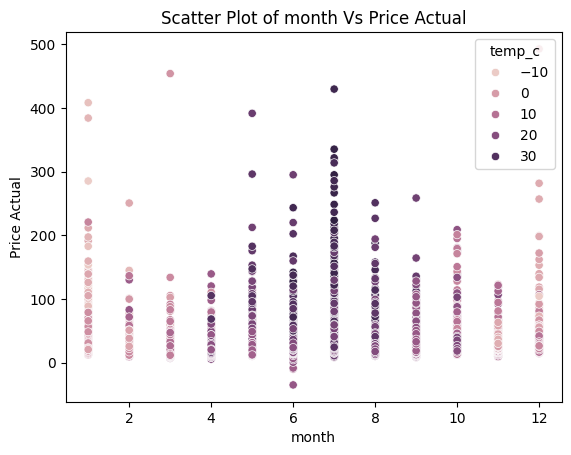

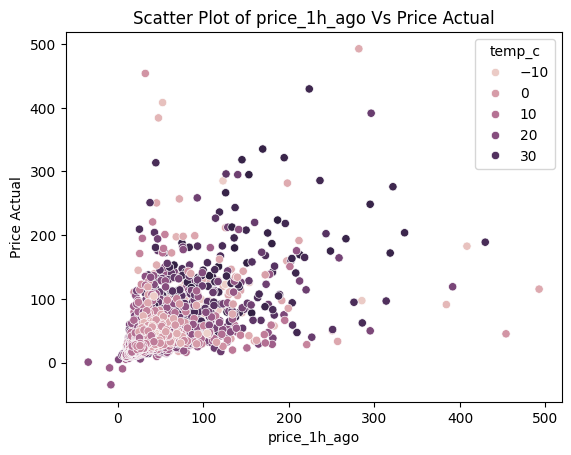

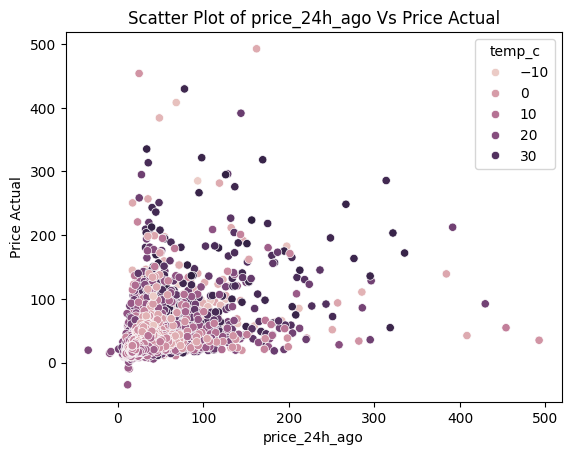

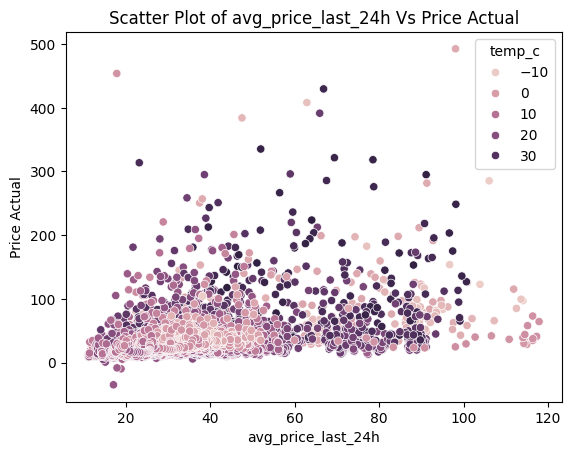

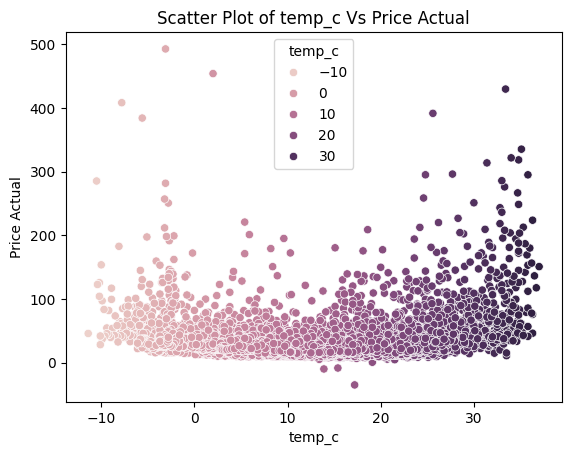

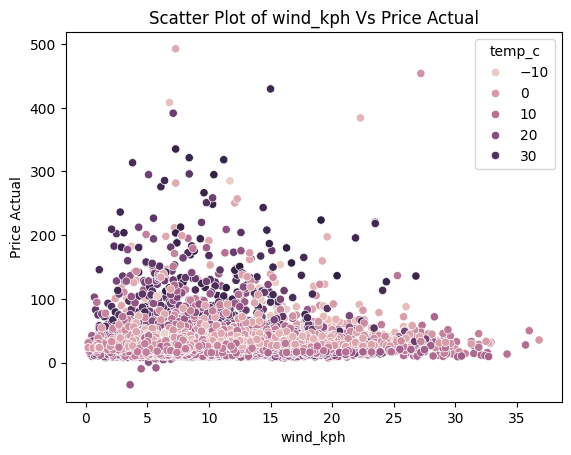

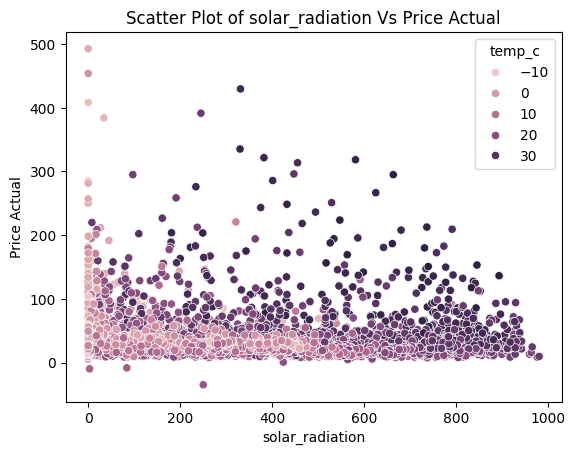

In [25]:
cols = [col for col in clean_df.columns if col != "price_actual"]
for col in cols:
    sns.scatterplot(x=col, y="price_actual", hue="temp_c", data=clean_df)
    plt.xlabel(col)
    plt.ylabel("Price Actual")
    plt.title(f"Scatter Plot of {col} Vs Price Actual")
    plt.show()

#### Heatmap Plot

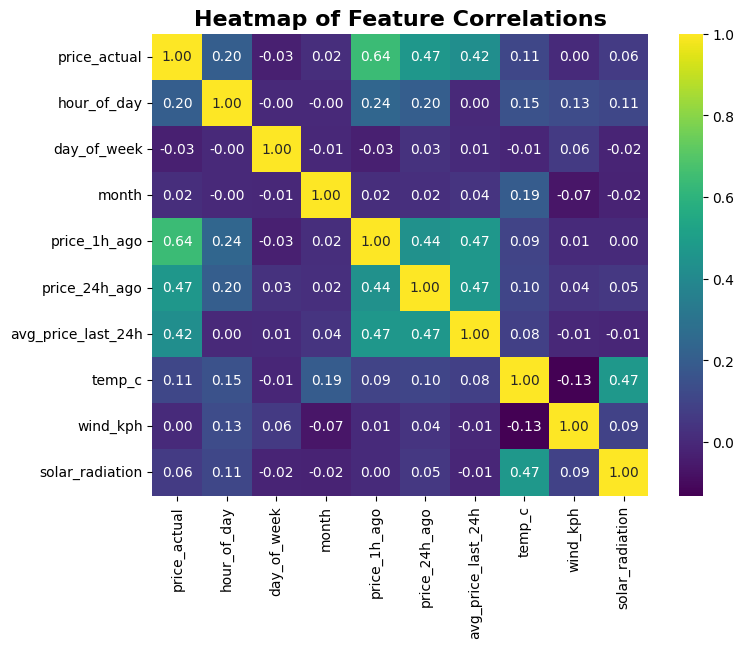

In [26]:
plt.figure(figsize=(8, 6))
# Pearson Correlation Heatamp
sns.heatmap(clean_df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="viridis")
plt.title("Heatmap of Feature Correlations", fontsize=16, fontweight="bold")
plt.show()

**Why price_1h_ago feels to be the best predictor** 

**NB:** In time-series (especially energy), the value at 4:00 PM is almost always very close to the value at 3:00 PM. This is called `Auto-Regressive (AR) behavior`.

## Step 5: Saving the DataFrame for Training

In [27]:
# Saving the training dataframe
# Save to the processed folder
output_path = "../data/processed/trained_data.csv"
clean_df.to_csv(output_path, index=True)

print(f"Data successfully saved to {output_path}")

Data successfully saved to ../data/processed/trained_data.csv


## Ready for Feature Engineering and ML 